<a href="https://colab.research.google.com/github/aliikhwan99/Different_stage_of_AD_detection/blob/main/Different_stage_of_AD_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil

nooraliikhwan_stage_of_alzheimer_path = kagglehub.dataset_download('nooraliikhwan/stage-of-alzheimer')

print('Data source import complete.')


# Step-by-Step Process

1. Convert DICOM to NIfTI (if necessary)
2. Preprocess the rs-fMRI data: Load the NIfTI file and process the fMRI data to extract time series or compute functional connectivity.
3. Visualize brain surfaces: Project the functional data to cortical surfaces.
4. Create Functional Connectivity Matrices: Compute correlation matrices to represent functional connectivity between brain regions.

# Compulsory Libraries

1. nibabel: For loading and handling DICOM/NIfTI files.
2. nilearn: For preprocessing, visualizing, and computing functional connectivity.
3. numpy: For matrix operations.
4. matplotlib: For visualizations.

# Convert DICOM files to NIfTI using the dcm2niix tool

In [ ]:
!apt-get install -y dcm2niix


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libturbojpeg libyaml-cpp0.6
Suggested packages:
  pigz
The following NEW packages will be installed:
  dcm2niix libturbojpeg libyaml-cpp0.6
0 upgraded, 3 newly installed, 0 to remove and 46 not upgraded.
Need to get 456 kB of archives.
After this operation, 1782 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libturbojpeg amd64 2.0.3-0ubuntu1.20.04.3 [156 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libyaml-cpp0.6 amd64 0.6.2-4ubuntu1 [124 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 dcm2niix amd64 1.0.20181125-1build1 [176 kB]
Fetched 456 kB in 6s (71.2 kB/s)  
Selecting previously unselected package libturbojpeg:amd64.
(Reading database ... 115958 files and directories currently installed.)
Preparing to unpack .../libturbojpeg_2.0.3-0ubuntu1

# Visualize DICOM file (rs-fMRI) using averaging across time (optional)

In [ ]:
!dcm2niix -o /kaggle/working/ -f fmri_image /kaggle/input/stage-of-alzheimer/EMCI/ADNI/002_S_2010/Resting_State_fMRI/2010-06-24_14_21_28.0/I180734


Compression will be faster with 'pigz' installed
Chris Rorden's dcm2niiX version v1.0.20181125  (JP2:OpenJPEG) GCC9.3.0 (64-bit Linux)
Found 5040 DICOM file(s)
swizzling 3rd and 4th dimensions (XYTZ -> XYZT), assuming interslice distance is 3.312500
Philips Scaling Values RS:RI:SS = 1.263:0:0.00042822 (see PMC3998685)
Convert 5040 DICOM as /kaggle/working/fmri_image (64x64x36x140)
Conversion required 86.524994 seconds (7.005145 for core code).


/opt/conda/lib/python3.10/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/opt/conda/lib/python3.10/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


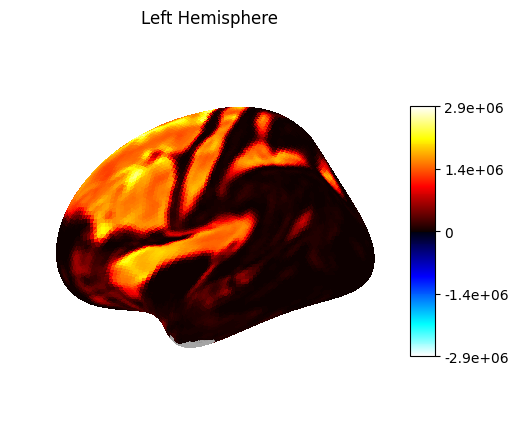

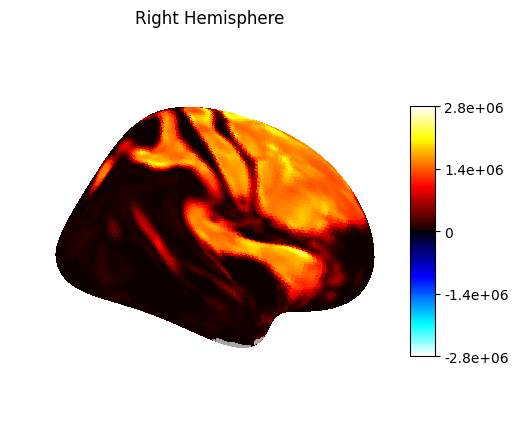

In [ ]:
from nilearn import image, datasets, surface, plotting

# Load your newly converted NIfTI image
fmri_img = image.load_img('/kaggle/working/fmri_image.nii')

# Select the first volume (if it's a 4D image, e.g., rs-fMRI data)
fmri_img_vol = image.index_img(fmri_img, 0)

# Load a standard brain surface for visualization
fsaverage = datasets.fetch_surf_fsaverage()

# Project the selected volume to the cortical surface
texture_left = surface.vol_to_surf(fmri_img_vol, fsaverage.pial_left)
texture_right = surface.vol_to_surf(fmri_img_vol, fsaverage.pial_right)

# Plot the projected data on the brain surface
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, hemi='left', title='Left Hemisphere')
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, hemi='right', title='Right Hemisphere')

plotting.show()


# ------------------------------

In [ ]:
import os
import pydicom
import numpy as np

# Path to the directory containing the DICOM files
dicom_directory = '/kaggle/input/stage-of-alzheimer/NC/ADNI/002_S_0295/Resting_State_fMRI/2011-06-02_07_56_36.0/I238623'

# Load the DICOM files
def load_dicom_series(directory):
    dicom_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.dcm')]
    dicom_files.sort()  # Sort the files to maintain order
    images = []
    for dicom_file in dicom_files:
        ds = pydicom.dcmread(dicom_file)
        images.append(ds.pixel_array)  # Append pixel data
    return np.array(images)

# Load the fMRI data from the DICOM files
fmri_data = load_dicom_series(dicom_directory)
print(f"Shape of fMRI data: {fmri_data.shape}")  # (time_points, height, width)


Shape of fMRI data: (6720, 64, 64)


In [ ]:
import nibabel as nib

# Convert fMRI data to NIfTI format
nifti_img = nib.Nifti1Image(fmri_data, np.eye(4))  # You may need to adjust the affine transformation

# Save the NIfTI file
nifti_path = '/kaggle/working/fmri_image.nii'
nib.save(nifti_img, nifti_path)

print(f"NIfTI image saved at: {nifti_path}")


NIfTI image saved at: /kaggle/working/fmri_image.nii


/opt/conda/lib/python3.10/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/opt/conda/lib/python3.10/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


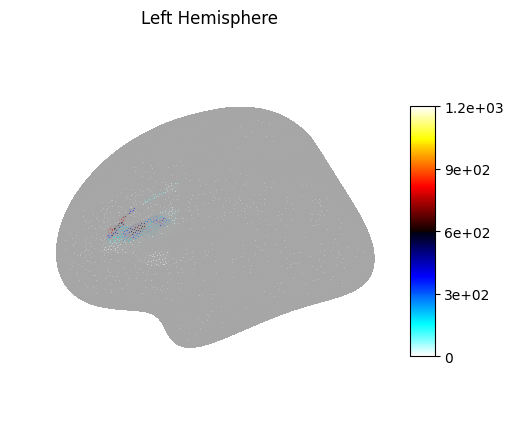

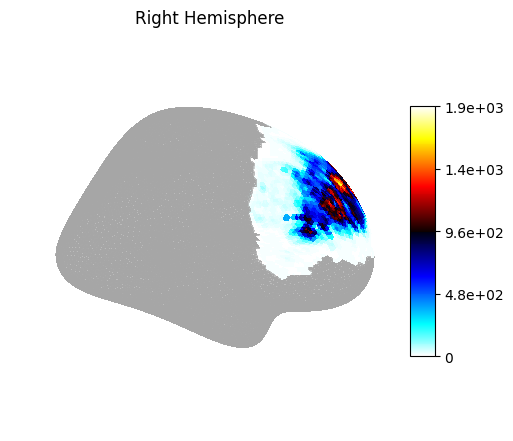

In [ ]:
from nilearn import image, plotting, surface, datasets

# Load the NIfTI image (3D image)
fmri_img = image.load_img(nifti_path)

# Load a standard brain surface for visualization
fsaverage = datasets.fetch_surf_fsaverage()

# Project the 3D image to the cortical surface
texture_left = surface.vol_to_surf(fmri_img, fsaverage.pial_left)
texture_right = surface.vol_to_surf(fmri_img, fsaverage.pial_right)

# Plot the projected data on the brain surface
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_left, hemi='left', title='Left Hemisphere')
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_right, hemi='right', title='Right Hemisphere')

plotting.show()


# ----------------------------------

# Connecticome Visualization

# Extract Time Series from Brain Regions

In [ ]:
from nilearn import datasets, input_data

# Load your fMRI data (replace with the actual path to your preprocessed rs-fMRI data)
fmri_img = '/kaggle/input/stage-of-alzheimer/EMCI/ADNI/002_S_2010/Resting_State_fMRI/2010-06-24_14_21_28.0/I180734'

# Load an atlas to define brain regions (e.g., Harvard-Oxford atlas)
atlas_dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')
atlas_filename = atlas_dataset.filename

# Create a masker to extract the time series for each region defined by the atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, memory='nilearn_cache')

# Extract time series data for each brain region
time_series = masker.fit_transform(fmri_img)


ImageFileError: Empty file: '/kaggle/input/stage-of-alzheimer/EMCI/ADNI/002_S_2010/Resting_State_fMRI/2010-06-24_14_21_28.0/I180734'

In [ ]:
import os

print("Converted files:")
print(os.listdir(output_directory))


Converted files:
['fmri_image.json', 'fmri_image.nii', 'Resting_State_fMRI_501.json', 'Resting_State_fMRI_501.nii.gz', '.virtual_documents']


/opt/conda/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.05683015139310564330'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
/opt/conda/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.06282883507200984267'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
/opt/conda/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.06279230344779385614'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
/opt/conda/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '2.16.

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 180
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.05683015139310564330
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.3688024390674402269
-------------------------------------------------
(0008,0000) Group Length                        UL: 1346
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008,0013) Instance Creation Time              TM: '131928'
(0008,0014) Instance Creator UID                UI: 2.16.124.113543.6006.99.3051493601938435224
(0008,0016) SOP Class UID                       UI: MR Image Sto

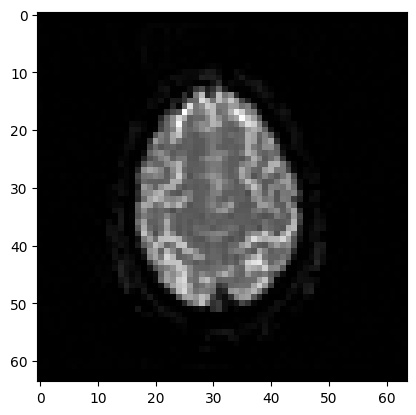

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# Define your DICOM directory
dicom_directory = '/kaggle/input/stage-of-alzheimer/MCI/ADNI/002_S_1155/Resting_State_fMRI/2012-12-20_12_16_12.0/I352947'

# List all files in the directory
files = os.listdir(dicom_directory)

# Filter to only get DICOM files (optional if there are non-DICOM files)
dicom_files = [f for f in files if f.endswith('.dcm')]

# Check if any DICOM files exist
if len(dicom_files) == 0:
    print("No DICOM files found in the directory.")
else:
    # Load the first DICOM file
    dicom_file = os.path.join(dicom_directory, dicom_files[0])
    ds = pydicom.dcmread(dicom_file)

    # Print metadata
    print(ds)

    # Extract and plot the image data (if available)
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    plt.show()


# Compute Functional Connectivity

In [ ]:
import numpy as np
from nilearn.connectome import ConnectivityMeasure

# Initialize the correlation measure (you can use 'correlation' or 'partial correlation')
correlation_measure = ConnectivityMeasure(kind='correlation')

# Compute the correlation matrix (functional connectivity)
correlation_matrix = correlation_measure.fit_transform([time_series])[0]


# Visualizing as a Connectivity Matrix

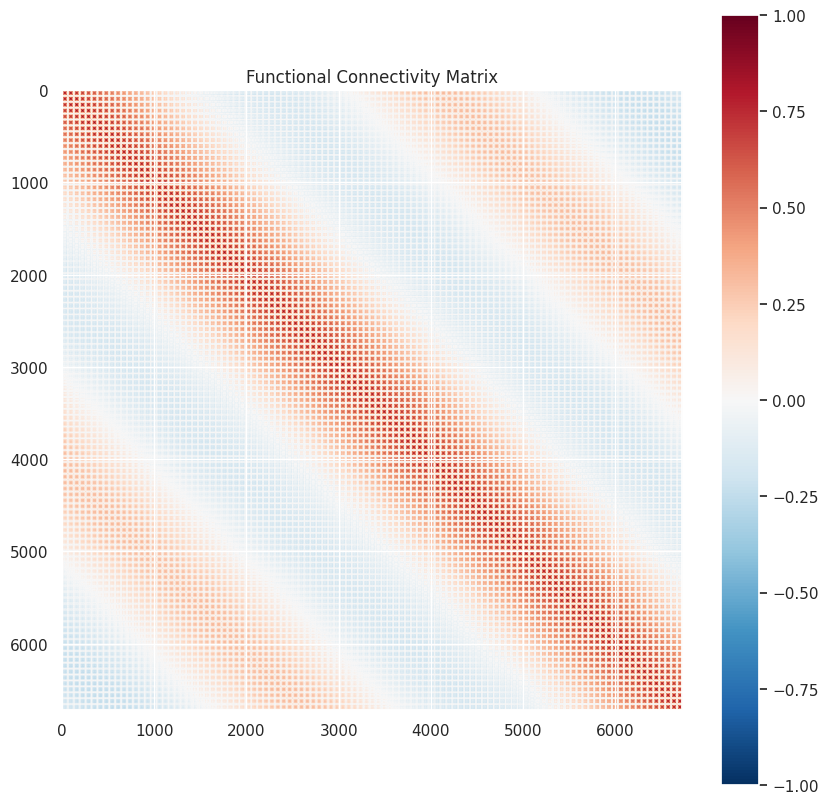

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Functional Connectivity Matrix')
plt.show()


# Visualizing as a Connectome Grap

ValueError: Shape mismatch between 'adjacency_matrix' and 'node_coords''adjacency_matrix' shape is (6720, 6720), 'node_coords' shape is (48, 3)

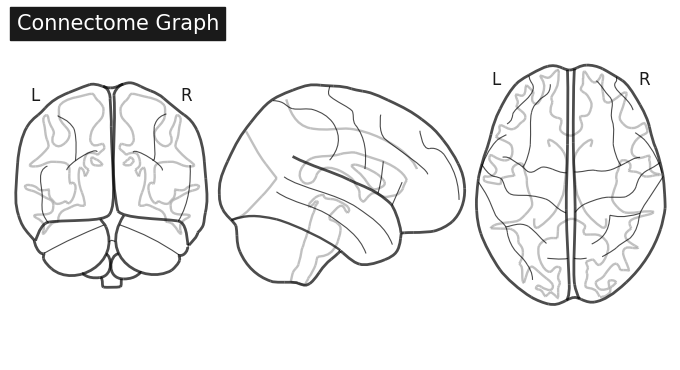

In [ ]:
from nilearn import plotting

# Get the coordinates of brain regions from the atlas
coords = plotting.find_parcellation_cut_coords(atlas_filename)

# Plot the connectome (threshold is used to limit the number of edges displayed)
plotting.plot_connectome(correlation_matrix, coords, edge_threshold='90%', title="Connectome Graph")
plotting.show()


In [ ]:
from nilearn import datasets, input_data, plotting

# Load the Harvard-Oxford atlas (48 regions)
atlas_dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')
atlas_filename = atlas_dataset.filename

# Extract time series from the 48 regions defined by the atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(fmri_img)

# Calculate the correlation matrix
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Get the coordinates for the 48 regions
coords = plotting.find_parcellation_cut_coords(atlas_filename)

# Plot the connectome
plotting.plot_connectome(correlation_matrix, coords, edge_threshold='90%', title="Connectome Graph")
plotting.show()


ImageFileError: Empty file: '/kaggle/input/stage-of-alzheimer/EMCI/ADNI/002_S_2010/Resting_State_fMRI/2010-06-24_14_21_28.0/I180734'

# Normal

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 180
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.6446586041935783947
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.08409762046509091250
-------------------------------------------------
(0008,0000) Group Length                        UL: 1336
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008,0013) Instance Creation Time              TM: '104929'
(0008,0014) Instance Creator UID                UI: 2.16.124.113543.6006.99.3051493601938435224
(0008,0016) SOP Class UID                       UI: MR Image Sto

/opt/conda/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.08409762046509091250'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
/opt/conda/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.08683781645161392435'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
/opt/conda/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.04130835148189647289'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
/opt/conda/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '2.16.

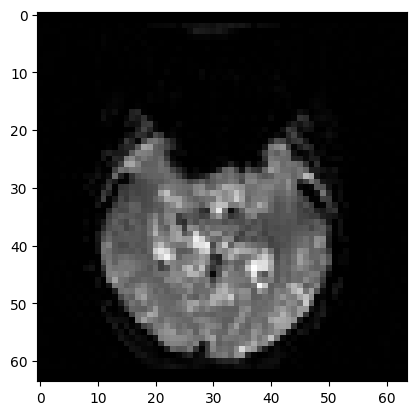

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# Define your DICOM directory
dicom_directory = '/kaggle/input/stage-of-alzheimer/NC/ADNI/002_S_0295/Resting_State_fMRI/2011-06-02_07_56_36.0/I238623'

# List all files in the directory
files = os.listdir(dicom_directory)

# Filter to only get DICOM files (optional if there are non-DICOM files)
dicom_files = [f for f in files if f.endswith('.dcm')]

# Check if any DICOM files exist
if len(dicom_files) == 0:
    print("No DICOM files found in the directory.")
else:
    # Load the first DICOM file
    dicom_file = os.path.join(dicom_directory, dicom_files[1])
    ds = pydicom.dcmread(dicom_file)

    # Print metadata
    print(ds)

    # Extract and plot the image data (if available)
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    plt.show()


# Visualizing the Connectivity Matrix

# Normal

Directory exists: /kaggle/input/stage-of-alzheimer/NC/ADNI/002_S_0295/Resting_State_fMRI/2011-06-02_07_56_36.0/I238623
Shape of fMRI data: (6720, 64, 64)
Shape of time series data: (4096, 6720)
Shape of connectivity matrix: (4096, 4096)

Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/aal_SPM12



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/aal_SPM12/a4f2a6316ec7f29f771edef840308edf/aal_for_SPM12.tar.gz..... done.


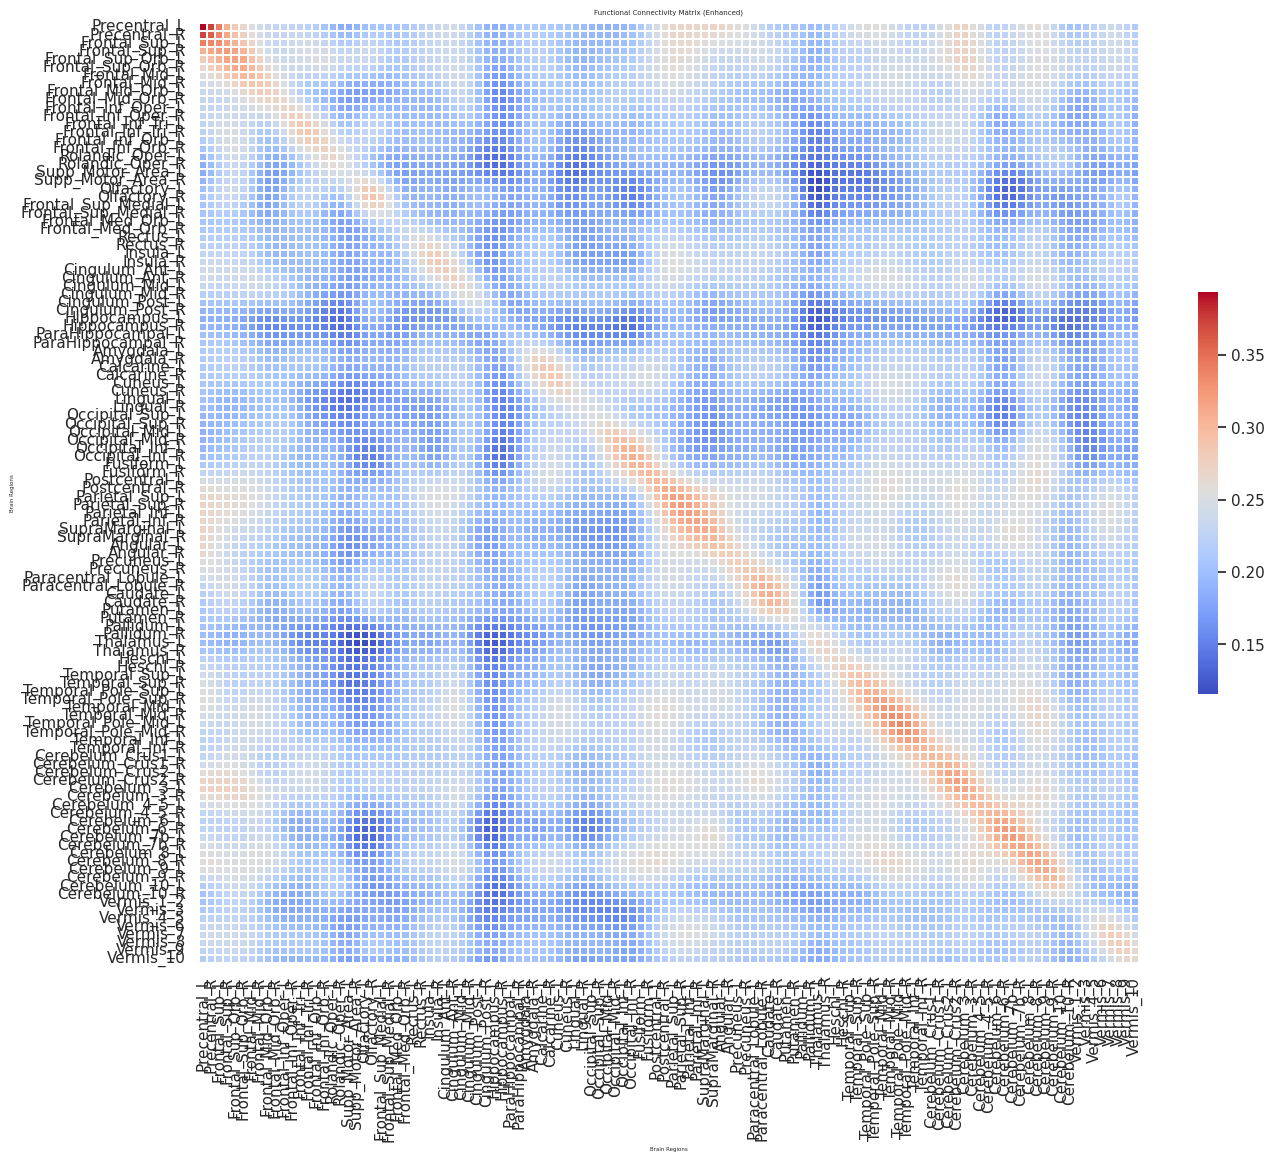

In [ ]:
import os
import numpy as np
import pydicom  # Make sure pydicom is installed in your environment
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets
from scipy.ndimage import gaussian_filter  # Import Gaussian filter

# Path to the directory containing the DICOM files
dicom_directory = '/kaggle/input/stage-of-alzheimer/NC/ADNI/002_S_0295/Resting_State_fMRI/2011-06-02_07_56_36.0/I238623'

# Check if the directory exists
if not os.path.exists(dicom_directory):
    print(f"Directory not found: {dicom_directory}")
else:
    print(f"Directory exists: {dicom_directory}")

    # Load the DICOM files
    def load_dicom_series(directory):
        dicom_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.dcm')]
        dicom_files.sort()  # Sort the files to maintain order
        images = []
        for dicom_file in dicom_files:
            ds = pydicom.dcmread(dicom_file)
            images.append(ds.pixel_array)  # Append pixel data
        return np.array(images)

    # Load your fMRI data
    fmri_data = load_dicom_series(dicom_directory)
    print(f"Shape of fMRI data: {fmri_data.shape}")  # (time_points, height, width)

# Function to extract time series from the 4D fMRI data
def extract_time_series(fmri_data):
    # Get the shape of the fMRI data
    time_points, height, width = fmri_data.shape[0], fmri_data.shape[1], fmri_data.shape[2]

    # Reshape to a 2D array: (voxels, time_points)
    reshaped_data = fmri_data.reshape(-1, time_points)
    return reshaped_data

# Extract time series from the fMRI data
time_series = extract_time_series(fmri_data)
print(f"Shape of time series data: {time_series.shape}")  # (voxels, time_points)

# Function to compute the functional connectivity matrix
def compute_functional_connectivity(time_series):
    # Calculate the correlation matrix
    connectivity_matrix = np.corrcoef(time_series)
    return connectivity_matrix

# Compute the functional connectivity matrix
connectivity_matrix = compute_functional_connectivity(time_series)
print(f"Shape of connectivity matrix: {connectivity_matrix.shape}")  # (voxels, voxels)

# Apply Gaussian filter to the functional connectivity matrix
smoothed_connectivity_matrix = gaussian_filter(connectivity_matrix, sigma=2)  # You can adjust sigma value

# Load the AAL brain atlas and its labels
atlas = datasets.fetch_atlas_aal()
atlas_labels = atlas['labels']  # Get brain region labels

# Truncate the connectivity matrix if it's larger than the number of available atlas labels
num_labels = len(atlas_labels)
if smoothed_connectivity_matrix.shape[0] > num_labels:
    truncated_connectivity_matrix = smoothed_connectivity_matrix[:num_labels, :num_labels]
else:
    truncated_connectivity_matrix = smoothed_connectivity_matrix  # Use the original if no truncation needed

# Function to plot a clearer connectivity matrix with enhancements
def plot_enhanced_connectivity_matrix(connectivity_matrix, labels):
    plt.figure(figsize=(14, 12), dpi=100)  # Increase size and DPI
    sns.set(font_scale=1)  # Increase font scale for better readability
    sns.heatmap(connectivity_matrix, cmap='coolwarm', square=True,
                xticklabels=labels[:connectivity_matrix.shape[0]],
                yticklabels=labels[:connectivity_matrix.shape[0]],
                cbar_kws={"shrink": .4}, linewidths=.2)  # Add lines between cells for clarity
    plt.title('Functional Connectivity Matrix (Enhanced)', fontsize=5)
    plt.xlabel('Brain Regions', fontsize=4)
    plt.ylabel('Brain Regions', fontsize=4)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit everything well
    plt.show()

# Plot the enhanced connectivity matrix with the AAL labels
plot_enhanced_connectivity_matrix(truncated_connectivity_matrix, atlas_labels)


In [ ]:
import numpy as np

# Compute the functional connectivity matrix
connectivity_matrix = compute_functional_connectivity(time_series)

# Apply Gaussian filter (optional)
smoothed_connectivity_matrix = gaussian_filter(connectivity_matrix, sigma=2)  # Adjust sigma as needed

# Print the raw connectivity matrix (before smoothing)
print("Raw Functional Connectivity Matrix:")
print(connectivity_matrix)

# Print the smoothed connectivity matrix (optional, after smoothing)
print("\nSmoothed Functional Connectivity Matrix:")
print(smoothed_connectivity_matrix)

# Optional: Print a specific pair-wise correlation (between brain region i and j)
i, j = 0, 1  # Adjust these indices to print the correlation between regions i and j
print(f"\nCorrelation between region {i} and region {j}: {connectivity_matrix[i, j]}")

# Example of printing all pair-wise correlations in a readable format (limited to first few rows/columns)
print("\nPair-Wise Correlations (Numerical):")
for i in range(5):  # Adjust the range to print more or fewer regions
    for j in range(5):
        print(f"Correlation between region {i} and region {j}: {connectivity_matrix[i, j]:.4f}")


Raw Functional Connectivity Matrix:
[[ 1.          0.10406521  0.19959037 ...  0.18065973  0.34768413
   0.03963683]
 [ 0.10406521  1.          0.1116993  ...  0.16720166  0.21247362
   0.22327543]
 [ 0.19959037  0.1116993   1.         ...  0.21747145  0.09492077
   0.63660402]
 ...
 [ 0.18065973  0.16720166  0.21747145 ...  1.         -0.04371099
   0.18398127]
 [ 0.34768413  0.21247362  0.09492077 ... -0.04371099  1.
  -0.07819569]
 [ 0.03963683  0.22327543  0.63660402 ...  0.18398127 -0.07819569
   1.        ]]

Smoothed Functional Connectivity Matrix:
[[0.39338615 0.37304466 0.34098608 ... 0.19898381 0.20664813 0.21195129]
 [0.37304466 0.35965082 0.33764494 ... 0.20445904 0.21211916 0.21752701]
 [0.34098608 0.33764494 0.33052673 ... 0.21199355 0.21936853 0.22476614]
 ...
 [0.19898381 0.20445904 0.21199355 ... 0.2579531  0.26662854 0.27277747]
 [0.20664813 0.21211916 0.21936853 ... 0.26662854 0.28759184 0.30152845]
 [0.21195129 0.21752701 0.22476614 ... 0.27277747 0.30152845 0.32063

# EMCI

Directory exists: /kaggle/input/stage-of-alzheimer/EMCI/ADNI/002_S_2010/Resting_State_fMRI/2010-06-24_14_21_28.0/I180734
Shape of fMRI data: (5040, 64, 64)
Shape of time series data: (4096, 5040)
Shape of connectivity matrix: (4096, 4096)


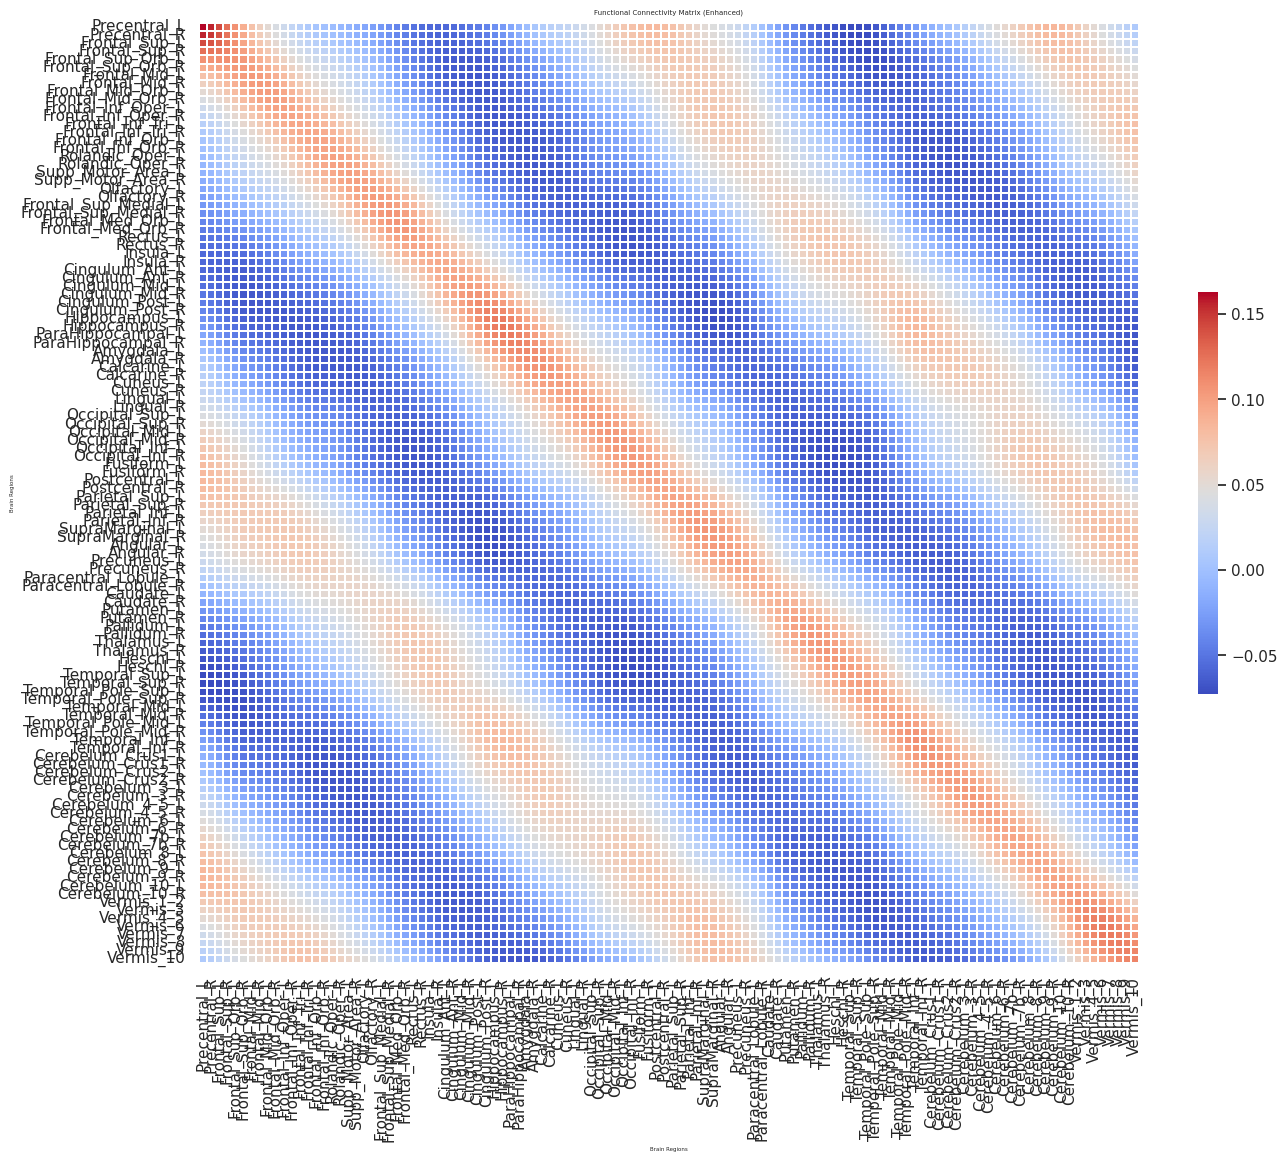

In [ ]:
import os
import numpy as np
import pydicom  # Make sure pydicom is installed in your environment
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets
from scipy.ndimage import gaussian_filter  # Import Gaussian filter
from scipy.ndimage import median_filter

# Path to the directory containing the DICOM files
dicom_directory = '/kaggle/input/stage-of-alzheimer/EMCI/ADNI/002_S_2010/Resting_State_fMRI/2010-06-24_14_21_28.0/I180734'

# Check if the directory exists
if not os.path.exists(dicom_directory):
    print(f"Directory not found: {dicom_directory}")
else:
    print(f"Directory exists: {dicom_directory}")

    # Load the DICOM files
    def load_dicom_series(directory):
        dicom_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.dcm')]
        dicom_files.sort()  # Sort the files to maintain order
        images = []
        for dicom_file in dicom_files:
            ds = pydicom.dcmread(dicom_file)
            images.append(ds.pixel_array)  # Append pixel data
        return np.array(images)

    # Load your fMRI data
    fmri_data = load_dicom_series(dicom_directory)
    print(f"Shape of fMRI data: {fmri_data.shape}")  # (time_points, height, width)

# Function to extract time series from the 4D fMRI data
def extract_time_series(fmri_data):
    # Get the shape of the fMRI data
    time_points, height, width = fmri_data.shape[0], fmri_data.shape[1], fmri_data.shape[2]

    # Reshape to a 2D array: (voxels, time_points)
    reshaped_data = fmri_data.reshape(-1, time_points)
    return reshaped_data

# Extract time series from the fMRI data
time_series = extract_time_series(fmri_data)
print(f"Shape of time series data: {time_series.shape}")  # (voxels, time_points)

# Function to compute the functional connectivity matrix
def compute_functional_connectivity(time_series):
    # Calculate the correlation matrix
    connectivity_matrix = np.corrcoef(time_series)
    return connectivity_matrix

# Apply median filter to reduce noise
filtered_matrix = median_filter(connectivity_matrix, size=3)  # Adjust size for the window size

# Compute the functional connectivity matrix
connectivity_matrix = compute_functional_connectivity(time_series)
print(f"Shape of connectivity matrix: {connectivity_matrix.shape}")  # (voxels, voxels)

# Apply Gaussian filter to the functional connectivity matrix
smoothed_connectivity_matrix = gaussian_filter(connectivity_matrix, sigma=3)  # You can adjust sigma value

# Load the AAL brain atlas and its labels
atlas = datasets.fetch_atlas_aal()
atlas_labels = atlas['labels']  # Get brain region labels

# Truncate the connectivity matrix if it's larger than the number of available atlas labels
num_labels = len(atlas_labels)
if smoothed_connectivity_matrix.shape[0] > num_labels:
    truncated_connectivity_matrix = smoothed_connectivity_matrix[:num_labels, :num_labels]
else:
    truncated_connectivity_matrix = smoothed_connectivity_matrix  # Use the original if no truncation needed

# Function to plot a clearer connectivity matrix with enhancements
def plot_enhanced_connectivity_matrix(connectivity_matrix, labels):
    plt.figure(figsize=(14, 12), dpi=100)  # Increase size and DPI
    sns.set(font_scale=1)  # Increase font scale for better readability
    sns.heatmap(connectivity_matrix, cmap='coolwarm', square=True,
                xticklabels=labels[:connectivity_matrix.shape[0]],
                yticklabels=labels[:connectivity_matrix.shape[0]],
                cbar_kws={"shrink": .4}, linewidths=.2)  # Add lines between cells for clarity
    plt.title('Functional Connectivity Matrix (Enhanced)', fontsize=5)
    plt.xlabel('Brain Regions', fontsize=4)
    plt.ylabel('Brain Regions', fontsize=4)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit everything well
    plt.show()

# Plot the enhanced connectivity matrix with the AAL labels
plot_enhanced_connectivity_matrix(truncated_connectivity_matrix, atlas_labels)


# LMCI

Directory exists: /kaggle/input/stage-of-alzheimer/LMCI/ADNI/002_S_4171/Resting_State_fMRI/2011-08-08_17_17_00.0/I249536
Shape of fMRI data: (6720, 64, 64)
Shape of time series data: (4096, 6720)
Shape of connectivity matrix: (4096, 4096)


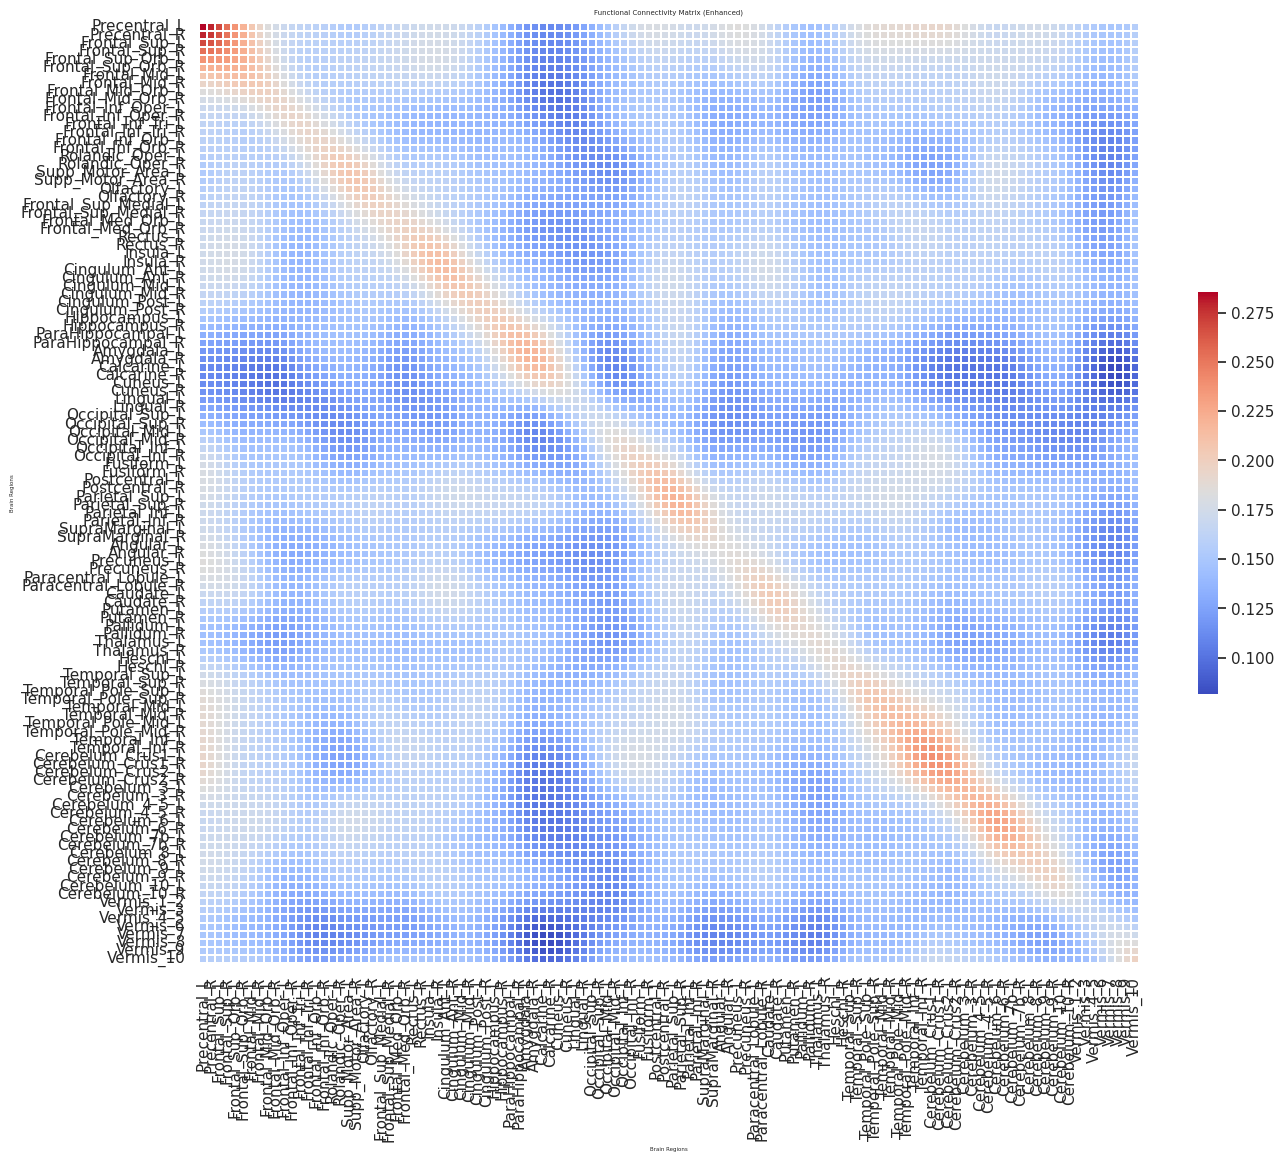

In [ ]:
import os
import numpy as np
import pydicom  # Make sure pydicom is installed in your environment
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets
from scipy.ndimage import gaussian_filter  # Import Gaussian filter
from scipy.ndimage import median_filter

# Path to the directory containing the DICOM files
dicom_directory = '/kaggle/input/stage-of-alzheimer/LMCI/ADNI/002_S_4171/Resting_State_fMRI/2011-08-08_17_17_00.0/I249536'

# Check if the directory exists
if not os.path.exists(dicom_directory):
    print(f"Directory not found: {dicom_directory}")
else:
    print(f"Directory exists: {dicom_directory}")

    # Load the DICOM files
    def load_dicom_series(directory):
        dicom_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.dcm')]
        dicom_files.sort()  # Sort the files to maintain order
        images = []
        for dicom_file in dicom_files:
            ds = pydicom.dcmread(dicom_file)
            images.append(ds.pixel_array)  # Append pixel data
        return np.array(images)

    # Load your fMRI data
    fmri_data = load_dicom_series(dicom_directory)
    print(f"Shape of fMRI data: {fmri_data.shape}")  # (time_points, height, width)

# Function to extract time series from the 4D fMRI data
def extract_time_series(fmri_data):
    # Get the shape of the fMRI data
    time_points, height, width = fmri_data.shape[0], fmri_data.shape[1], fmri_data.shape[2]

    # Reshape to a 2D array: (voxels, time_points)
    reshaped_data = fmri_data.reshape(-1, time_points)
    return reshaped_data

# Extract time series from the fMRI data
time_series = extract_time_series(fmri_data)
print(f"Shape of time series data: {time_series.shape}")  # (voxels, time_points)

# Function to compute the functional connectivity matrix
def compute_functional_connectivity(time_series):
    # Calculate the correlation matrix
    connectivity_matrix = np.corrcoef(time_series)
    return connectivity_matrix

# Apply median filter to reduce noise
filtered_matrix = median_filter(connectivity_matrix, size=3)  # Adjust size for the window size

# Compute the functional connectivity matrix
connectivity_matrix = compute_functional_connectivity(time_series)
print(f"Shape of connectivity matrix: {connectivity_matrix.shape}")  # (voxels, voxels)

# Apply Gaussian filter to the functional connectivity matrix
smoothed_connectivity_matrix = gaussian_filter(connectivity_matrix, sigma=3)  # You can adjust sigma value

# Load the AAL brain atlas and its labels
atlas = datasets.fetch_atlas_aal()
atlas_labels = atlas['labels']  # Get brain region labels

# Truncate the connectivity matrix if it's larger than the number of available atlas labels
num_labels = len(atlas_labels)
if smoothed_connectivity_matrix.shape[0] > num_labels:
    truncated_connectivity_matrix = smoothed_connectivity_matrix[:num_labels, :num_labels]
else:
    truncated_connectivity_matrix = smoothed_connectivity_matrix  # Use the original if no truncation needed

# Function to plot a clearer connectivity matrix with enhancements
def plot_enhanced_connectivity_matrix(connectivity_matrix, labels):
    plt.figure(figsize=(14, 12), dpi=100)  # Increase size and DPI
    sns.set(font_scale=1)  # Increase font scale for better readability
    sns.heatmap(connectivity_matrix, cmap='coolwarm', square=True,
                xticklabels=labels[:connectivity_matrix.shape[0]],
                yticklabels=labels[:connectivity_matrix.shape[0]],
                cbar_kws={"shrink": .4}, linewidths=.2)  # Add lines between cells for clarity
    plt.title('Functional Connectivity Matrix (Enhanced)', fontsize=5)
    plt.xlabel('Brain Regions', fontsize=4)
    plt.ylabel('Brain Regions', fontsize=4)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit everything well
    plt.show()

# Plot the enhanced connectivity matrix with the AAL labels
plot_enhanced_connectivity_matrix(truncated_connectivity_matrix, atlas_labels)


# MCI

Directory exists: /kaggle/input/stage-of-alzheimer/MCI/ADNI/002_S_1155/Resting_State_fMRI/2012-12-20_12_16_12.0/I352947
Shape of fMRI data: (6720, 64, 64)
Shape of time series data: (4096, 6720)
Shape of connectivity matrix: (4096, 4096)


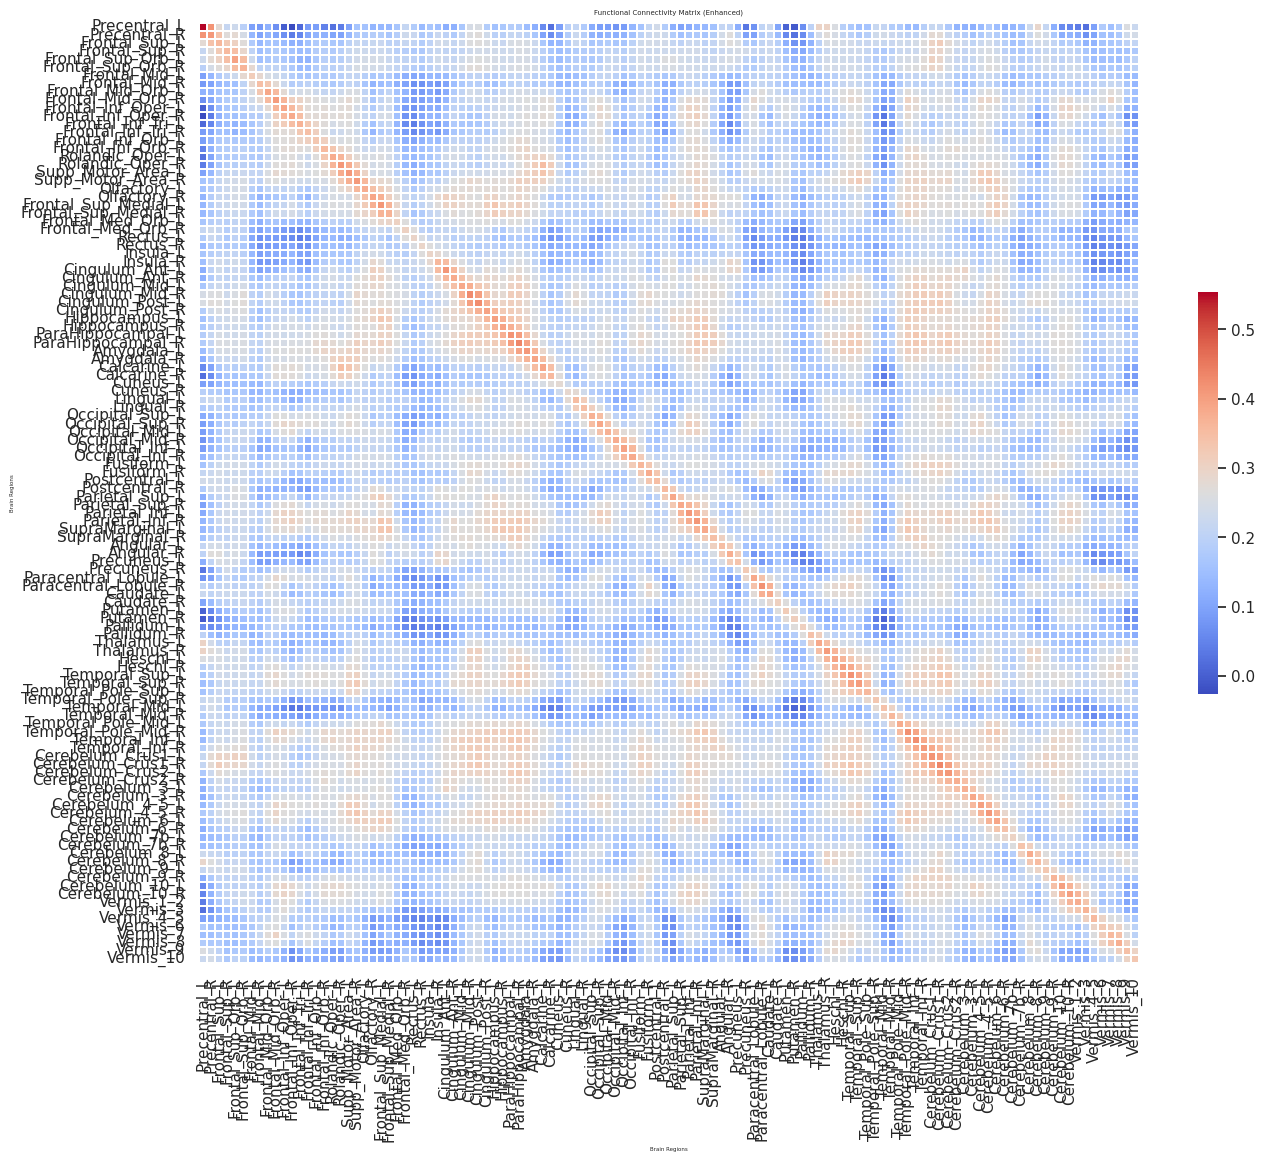

In [ ]:
import os
import numpy as np
import pydicom  # Make sure pydicom is installed in your environment
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets
from scipy.ndimage import gaussian_filter  # Import Gaussian filter
from scipy.ndimage import median_filter

# Path to the directory containing the DICOM files
dicom_directory = '/kaggle/input/stage-of-alzheimer/MCI/ADNI/002_S_1155/Resting_State_fMRI/2012-12-20_12_16_12.0/I352947'

# Check if the directory exists
if not os.path.exists(dicom_directory):
    print(f"Directory not found: {dicom_directory}")
else:
    print(f"Directory exists: {dicom_directory}")

    # Load the DICOM files
    def load_dicom_series(directory):
        dicom_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.dcm')]
        dicom_files.sort()  # Sort the files to maintain order
        images = []
        for dicom_file in dicom_files:
            ds = pydicom.dcmread(dicom_file)
            images.append(ds.pixel_array)  # Append pixel data
        return np.array(images)

    # Load your fMRI data
    fmri_data = load_dicom_series(dicom_directory)
    print(f"Shape of fMRI data: {fmri_data.shape}")  # (time_points, height, width)

# Function to extract time series from the 4D fMRI data
def extract_time_series(fmri_data):
    # Get the shape of the fMRI data
    time_points, height, width = fmri_data.shape[0], fmri_data.shape[1], fmri_data.shape[2]

    # Reshape to a 2D array: (voxels, time_points)
    reshaped_data = fmri_data.reshape(-1, time_points)
    return reshaped_data

# Extract time series from the fMRI data
time_series = extract_time_series(fmri_data)
print(f"Shape of time series data: {time_series.shape}")  # (voxels, time_points)

# Function to compute the functional connectivity matrix
def compute_functional_connectivity(time_series):
    # Calculate the correlation matrix
    connectivity_matrix = np.corrcoef(time_series)
    return connectivity_matrix

# Apply median filter to reduce noise
filtered_matrix = median_filter(connectivity_matrix, size=3)  # Adjust size for the window size

# Compute the functional connectivity matrix
connectivity_matrix = compute_functional_connectivity(time_series)
print(f"Shape of connectivity matrix: {connectivity_matrix.shape}")  # (voxels, voxels)

# Apply Gaussian filter to the functional connectivity matrix
smoothed_connectivity_matrix = gaussian_filter(connectivity_matrix, sigma=1)  # You can adjust sigma value

# Load the AAL brain atlas and its labels
atlas = datasets.fetch_atlas_aal()
atlas_labels = atlas['labels']  # Get brain region labels

# Truncate the connectivity matrix if it's larger than the number of available atlas labels
num_labels = len(atlas_labels)
if smoothed_connectivity_matrix.shape[0] > num_labels:
    truncated_connectivity_matrix = smoothed_connectivity_matrix[:num_labels, :num_labels]
else:
    truncated_connectivity_matrix = smoothed_connectivity_matrix  # Use the original if no truncation needed

# Function to plot a clearer connectivity matrix with enhancements
def plot_enhanced_connectivity_matrix(connectivity_matrix, labels):
    plt.figure(figsize=(14, 12), dpi=100)  # Increase size and DPI
    sns.set(font_scale=1)  # Increase font scale for better readability
    sns.heatmap(connectivity_matrix, cmap='coolwarm', square=True,
                xticklabels=labels[:connectivity_matrix.shape[0]],
                yticklabels=labels[:connectivity_matrix.shape[0]],
                cbar_kws={"shrink": .4}, linewidths=.2)  # Add lines between cells for clarity
    plt.title('Functional Connectivity Matrix (Enhanced)', fontsize=5)
    plt.xlabel('Brain Regions', fontsize=4)
    plt.ylabel('Brain Regions', fontsize=4)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit everything well
    plt.show()

# Plot the enhanced connectivity matrix with the AAL labels
plot_enhanced_connectivity_matrix(truncated_connectivity_matrix, atlas_labels)


# Actual brain activity position

In [ ]:
pip install nilearn matplotlib


Note: you may need to restart the kernel to use updated packages.


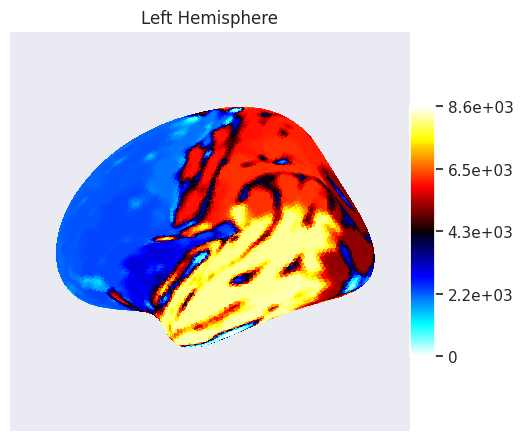

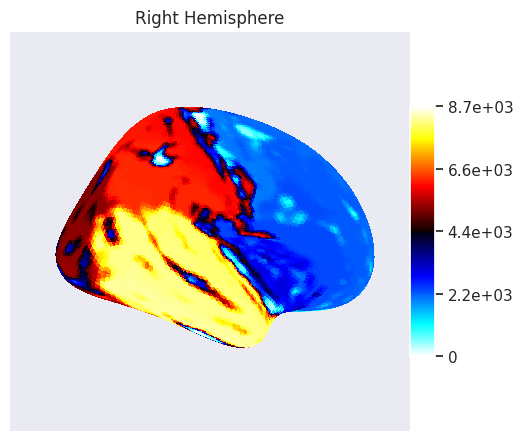

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, surface
from nilearn.input_data import NiftiLabelsMasker

# Mock example of your connectivity matrix; replace with your actual matrix
connectivity_matrix = np.random.rand(90, 90)  # Example connectivity matrix (90 regions)

# Load the AAL atlas
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas['maps']  # AAL atlas NIfTI file
atlas_labels = atlas['labels']  # Get brain region labels

# Load a standard brain surface for visualization
fsaverage = datasets.fetch_surf_fsaverage()

# Use NiftiLabelsMasker to extract time series data based on atlas regions
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)

# Prepare a 1D array to represent the functional connectivity on the brain surface
left_connectivity = np.zeros(45)  # For left hemisphere
right_connectivity = np.zeros(45)  # For right hemisphere

# Map connectivity values to left and right hemispheres
for i in range(len(atlas_labels)):
    if i < 45:  # Left hemisphere
        left_connectivity[i] = connectivity_matrix[i, :].mean()  # Example aggregation
    elif i < 90:  # Right hemisphere
        right_index = i - 45  # Adjust index for right hemisphere
        right_connectivity[right_index] = connectivity_matrix[i, :].mean()  # Example aggregation

# Project the AAL atlas regions onto the brain surface
texture_left = surface.vol_to_surf(atlas_filename, fsaverage.pial_left)
texture_right = surface.vol_to_surf(atlas_filename, fsaverage.pial_right)

# Plot the left hemisphere
plotting.plot_surf_stat_map(fsaverage['infl_left'],
                            stat_map=texture_left,
                            hemi='left',
                            view='lateral',
                            title='Left Hemisphere',
                            colorbar=True)

# Plot the right hemisphere
plotting.plot_surf_stat_map(fsaverage['infl_right'],
                            stat_map=texture_right,
                            hemi='right',
                            view='lateral',
                            title='Right Hemisphere',
                            colorbar=True)

plt.show()
